<a href="https://colab.research.google.com/github/IshratJahan1623/Intro-to-Machine-Learning/blob/main/Homeowrk_2/HW-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1(a)**

/tmp/ipython-input-2784930799.py:43: RuntimeWarning: overflow encountered in square
  val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-2784930799.py:41: RuntimeWarning: overflow encountered in square
  train_loss = (1/(2*m)) * np.sum(error**2)


Learning Rate = 0.015
Weights (theta): [nan nan nan nan nan]
Bias: nan
Final Train Loss: nan, Final Val Loss: nan


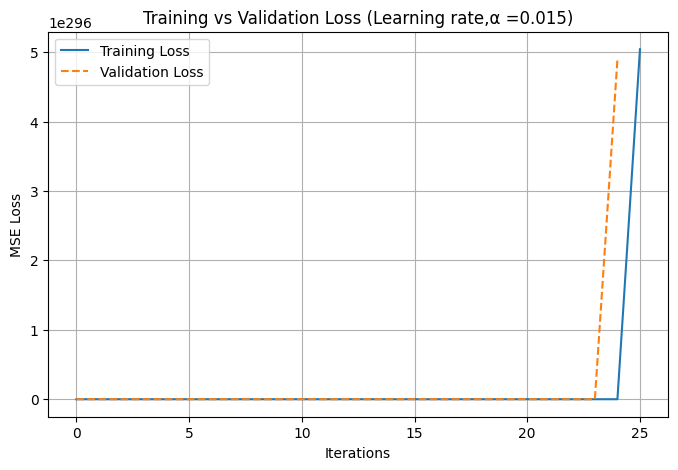

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Select input features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values.reshape(-1, 1)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Gradient descent (with explicit bias)
def gradient_descent(X_train, y_train, X_val, y_val, alpha, iterations):
    m, n = X_train.shape
    theta = np.zeros((n, 1))   # feature weights
    bias = 0.0                 # bias term (scalar)
    train_losses = []
    val_losses = []

    for i in range(iterations):
        # Predictions: Xθ + bias
        y_pred = X_train.dot(theta) + bias

        # Errors
        error = y_pred - y_train

        # Gradient updates
        dtheta = (1/m) * X_train.T.dot(error)
        dbias = (1/m) * np.sum(error)

        # Parameter updates
        theta -= alpha * dtheta
        bias  -= alpha * dbias

        # Compute losses
        train_loss = (1/(2*m)) * np.sum(error**2)
        val_error = (X_val.dot(theta) + bias - y_val)
        val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, bias, train_losses, val_losses

# 3. Train model with single learning rate
alpha = 0.015
iterations = 2000

theta, bias, train_losses, val_losses = gradient_descent(
    X_train, y_train, X_val, y_val,
    alpha=alpha, iterations=iterations
)

# Print results
print(f"Learning Rate = {alpha}")
print(f"Weights (theta): {theta.flatten()}")
print(f"Bias: {bias:.2f}")
print(f"Final Train Loss: {train_losses[-1]:.2f}, Final Val Loss: {val_losses[-1]:.2f}")

# Plot training and validation loss in a single graph
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title(f"Training vs Validation Loss (Learning rate,α ={alpha})")
plt.legend()
plt.grid(True)
plt.show()

## **1(b)**

/tmp/ipython-input-2585721381.py:52: RuntimeWarning: overflow encountered in square
  val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-2585721381.py:50: RuntimeWarning: overflow encountered in square
  train_loss = (1/(2*m)) * np.sum(error**2)


Learning Rate = 0.015
Weights (theta): [nan nan nan nan nan nan nan nan nan nan nan]
Bias: nan
Final Train Loss: nan, Final Val Loss: nan


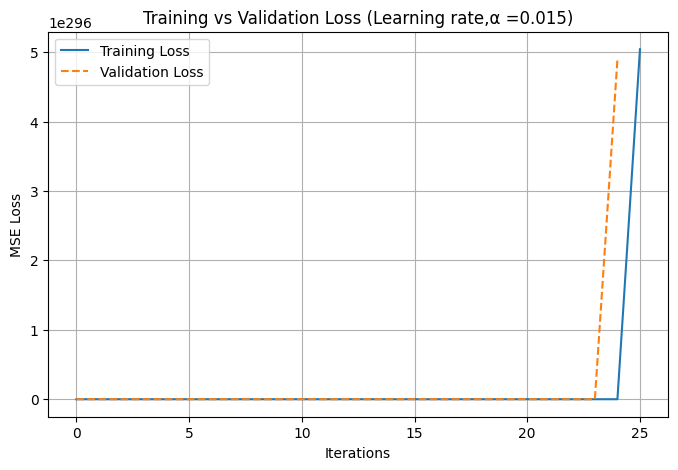

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Convert categorical Yes/No to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0, 'Yes':1, 'No':0})

# Select input features
features = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'
]
X = data[features].values.astype(float)  # ensure numeric
y = data['price'].values.reshape(-1, 1)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Gradient descent (with explicit bias)
def gradient_descent(X_train, y_train, X_val, y_val, alpha, iterations):
    m, n = X_train.shape
    theta = np.zeros((n, 1))   # feature weights
    bias = 0.0                 # bias term (scalar)
    train_losses = []
    val_losses = []

    for i in range(iterations):
        # Predictions: Xθ + bias
        y_pred = X_train.dot(theta) + bias

        # Errors
        error = y_pred - y_train

        # Gradient updates
        dtheta = (1/m) * X_train.T.dot(error)
        dbias = (1/m) * np.sum(error)

        # Parameter updates
        theta -= alpha * dtheta
        bias  -= alpha * dbias

        # Compute losses
        train_loss = (1/(2*m)) * np.sum(error**2)
        val_error = (X_val.dot(theta) + bias - y_val)
        val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, bias, train_losses, val_losses

# 3. Train model
alpha = 0.015
iterations = 5000

theta, bias, train_losses, val_losses = gradient_descent(
    X_train, y_train, X_val, y_val,
    alpha=alpha, iterations=iterations
)

# Print results
print(f"Learning Rate = {alpha}")
print(f"Weights (theta): {theta.flatten()}")
print(f"Bias: {bias:.2f}")
print(f"Final Train Loss: {train_losses[-1]:.2f}, Final Val Loss: {val_losses[-1]:.2f}")

# 4. Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title(f"Training vs Validation Loss (Learning rate,α ={alpha})")
plt.legend()
plt.grid(True)
plt.show()


## **2(a)**


Final Theta Values:
Normalization - Theta: [2582982.11917998 1438302.28594947 2052563.94888117 1614637.35295041
 1470854.14705899]
Normalization - Bias: 2592649.041766281

Standardization - Theta: [680058.42348192 112973.19456888 565408.61405601 424354.80629097
 288348.77273207]
Standardization - Bias: 4706527.385320749


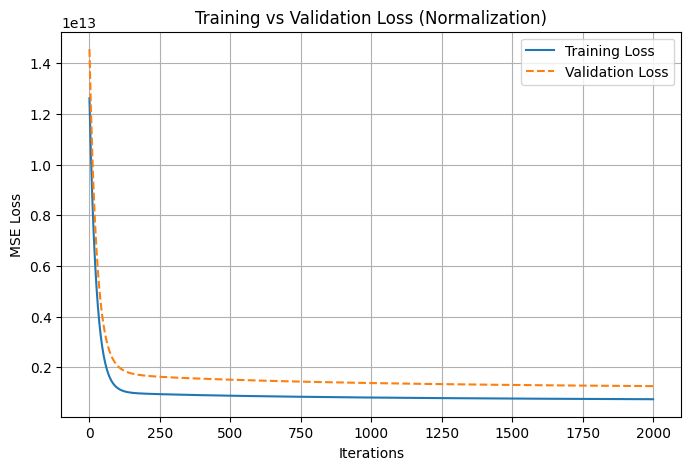

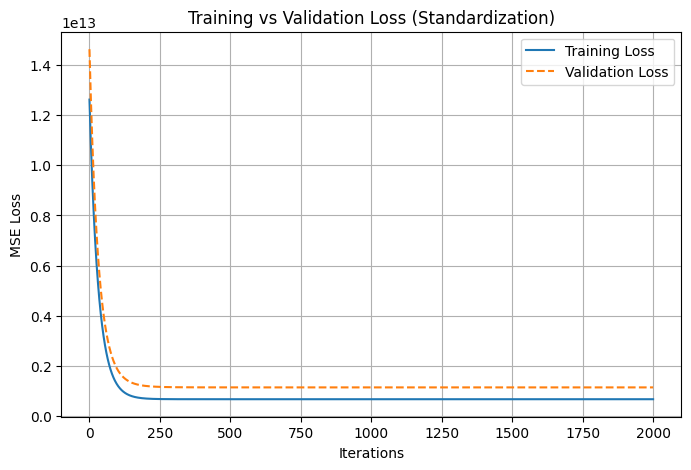

Final Train Loss (Normalized): 740904235486.77, Validation Loss: 1257967289773.52
Final Train Loss (Standardized): 675004105663.29, Validation Loss: 1146360773107.97


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Load data
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)


# Select features and target (problem 1.a)
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values.reshape(-1, 1)

# Train-validation split
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Gradient descent function
def gradient_descent(X_train, y_train, X_val, y_val, alpha, iterations):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    bias = 0.0
    train_losses = []
    val_losses = []

    for i in range(iterations):
        y_pred = X_train.dot(theta) + bias
        error = y_pred - y_train

        # Gradients
        dtheta = (1/m) * X_train.T.dot(error)
        dbias = (1/m) * np.sum(error)

        # Update parameters
        theta -= alpha * dtheta
        bias -= alpha * dbias

        # Loss
        train_loss = (1/(2*m)) * np.sum(error**2)
        val_error = X_val.dot(theta) + bias - y_val
        val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, bias, train_losses, val_losses


# 3.a Normalization
minmax_scaler = MinMaxScaler()
X_train_norm = minmax_scaler.fit_transform(X_train_raw)
X_val_norm = minmax_scaler.transform(X_val_raw)

# 3.b Standardization
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train_raw)
X_val_std = std_scaler.transform(X_val_raw)


# 4. Train models
iterations = 2000
alpha = 0.015

# 4.a Normalization
theta_norm, bias_norm, train_losses_norm, val_losses_norm = gradient_descent(
    X_train_norm, y_train, X_val_norm, y_val, alpha=alpha, iterations=iterations
)

# 4.b Standardization
theta_std, bias_std, train_losses_std, val_losses_std = gradient_descent(
    X_train_std, y_train, X_val_std, y_val, alpha=alpha, iterations=iterations
)

# 5. Print final theta values
print("\nFinal Theta Values:")
print("Normalization - Theta:", theta_norm.flatten())
print("Normalization - Bias:", bias_norm)
print("\nStandardization - Theta:", theta_std.flatten())
print("Standardization - Bias:", bias_std)

# 6. Plot training and validation loss separately
# Normalization plot
plt.figure(figsize=(8,5))
plt.plot(train_losses_norm, label="Training Loss")
plt.plot(val_losses_norm, label="Validation Loss", linestyle='--')
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss (Normalization)")
plt.legend()
plt.grid(True)
plt.show()

# Standardization plot
plt.figure(figsize=(8,5))
plt.plot(train_losses_std, label="Training Loss")
plt.plot(val_losses_std, label="Validation Loss", linestyle='--')
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss (Standardization)")
plt.legend()
plt.grid(True)
plt.show()

# 7. Print final losses for comparison
print("Final Train Loss (Normalized): {:.2f}, Validation Loss: {:.2f}".format(
    train_losses_norm[-1], val_losses_norm[-1]
))
print("Final Train Loss (Standardized): {:.2f}, Validation Loss: {:.2f}".format(
    train_losses_std[-1], val_losses_std[-1]
))

## **2(b)**


Final Theta Values:
Normalization - Theta: [2738810.6205518   921645.50273419 2737624.72993612 1263973.99186352
  487132.65015112  297136.8512479   413348.93106039  721419.31170539
  842271.07488027  904960.64157825  649557.44109972]
Normalization - Bias: 1840438.4534273536

Standardization - Theta: [523387.27560796  58623.06229326 528975.10754913 365907.5807042
 144130.6077236   93366.50467182 208520.89054766 155907.28686967
 372995.82840639 211306.48841804 269576.1656238 ]
Standardization - Bias: 4706527.38532107


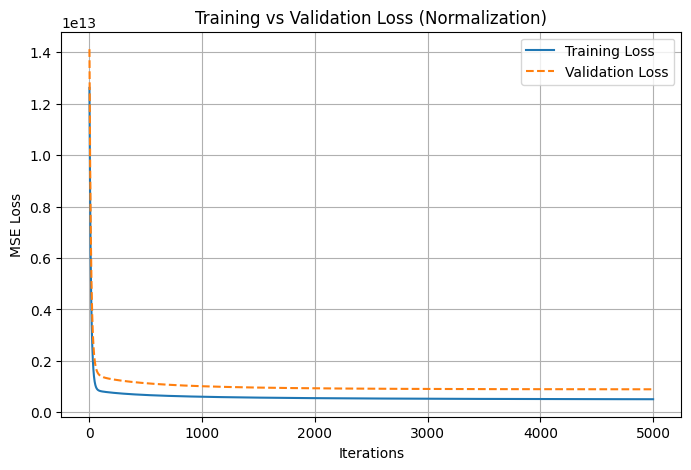

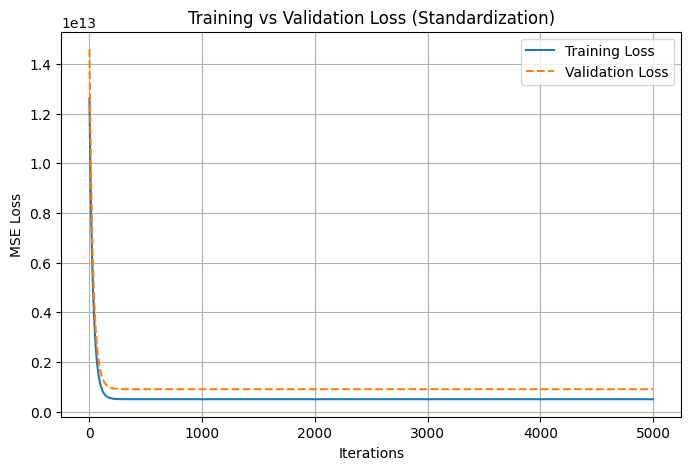

Final Train Loss (Normalized): 505918700120.79, Validation Loss: 892397045802.19
Final Train Loss (Standardized): 496240500004.89, Validation Loss: 900396859859.49


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Load data
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)


# Convert categorical Yes/No columns to 0/1
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0, 'Yes':1, 'No':0})

# Select input features for 1.b
features = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'
]
X = data[features].values.astype(float)
y = data['price'].values.reshape(-1, 1)

# Train-validation split
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Gradient descent function
def gradient_descent(X_train, y_train, X_val, y_val, alpha, iterations):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    bias = 0.0
    train_losses = []
    val_losses = []

    for i in range(iterations):
        y_pred = X_train.dot(theta) + bias
        error = y_pred - y_train

        # Gradients
        dtheta = (1/m) * X_train.T.dot(error)
        dbias = (1/m) * np.sum(error)

        # Update parameters
        theta -= alpha * dtheta
        bias -= alpha * dbias

        # Loss
        train_loss = (1/(2*m)) * np.sum(error**2)
        val_error = X_val.dot(theta) + bias - y_val
        val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, bias, train_losses, val_losses

# 3. Prepare scaled data
# 3.a Normalization
minmax_scaler = MinMaxScaler()
X_train_norm = minmax_scaler.fit_transform(X_train_raw)
X_val_norm = minmax_scaler.transform(X_val_raw)

# 3.b Standardization
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train_raw)
X_val_std = std_scaler.transform(X_val_raw)

# 4. Train models
iterations = 5000
alpha = 0.015  # can adjust depending on convergence

# 4.a Normalization
theta_norm, bias_norm, train_losses_norm, val_losses_norm = gradient_descent(
    X_train_norm, y_train, X_val_norm, y_val, alpha=alpha, iterations=iterations
)

# 4.b Standardization
theta_std, bias_std, train_losses_std, val_losses_std = gradient_descent(
    X_train_std, y_train, X_val_std, y_val, alpha=alpha, iterations=iterations
)



# 5. Print final theta values
print("\nFinal Theta Values:")
print("Normalization - Theta:", theta_norm.flatten())
print("Normalization - Bias:", bias_norm)
print("\nStandardization - Theta:", theta_std.flatten())
print("Standardization - Bias:", bias_std)


# 6. Plot training and validation loss separately
# Normalization plot
plt.figure(figsize=(8,5))
plt.plot(train_losses_norm, label="Training Loss")
plt.plot(val_losses_norm, label="Validation Loss", linestyle='--')
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss (Normalization)")
plt.legend()
plt.grid(True)
plt.show()

# Standardization plot
plt.figure(figsize=(8,5))
plt.plot(train_losses_std, label="Training Loss")
plt.plot(val_losses_std, label="Validation Loss", linestyle='--')
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss (Standardization)")
plt.legend()
plt.grid(True)
plt.show()


# 7. Print final losses for comparison
print("Final Train Loss (Normalized): {:.2f}, Validation Loss: {:.2f}".format(
    train_losses_norm[-1], val_losses_norm[-1]
))
print("Final Train Loss (Standardized): {:.2f}, Validation Loss: {:.2f}".format(
    train_losses_std[-1], val_losses_std[-1]
))

## **3(a)**


Standardization - Theta: [675923.91414429 115038.88124927 562369.3361177  421874.71068699
 288183.91191512]
Standardization - Bias: 4706527.385320749


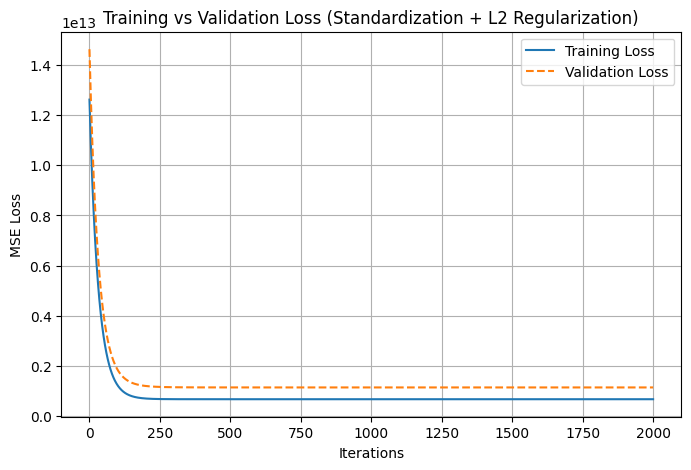

Final Train Loss (Normalized): 810180985061.69, Validation Loss: 1299537012441.06
Final Train Loss (Standardized): 678625967729.25, Validation Loss: 1148089052464.90


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Load data
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Select features and target (problem 1.a)
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values.reshape(-1, 1)

# Train-validation split
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Gradient descent function (now with L2 on training only)
def gradient_descent(X_train, y_train, X_val, y_val, alpha, iterations, lambda_l2):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    bias = 0.0
    train_losses = []
    val_losses = []

    for i in range(iterations):
        y_pred = X_train.dot(theta) + bias
        error = y_pred - y_train

        # Gradients (L2 regularization on theta only; bias not regularized)
        dtheta = (1/m) * X_train.T.dot(error) + (lambda_l2 / m) * theta
        dbias = (1/m) * np.sum(error)

        # Update parameters
        theta -= alpha * dtheta
        bias -= alpha * dbias

        # Training loss WITH L2 penalty
        train_loss = (1/(2*m)) * np.sum(error**2) + (lambda_l2/(2*m)) * np.sum(theta**2)

        # Validation loss WITHOUT regularization
        val_error = X_val.dot(theta) + bias - y_val
        val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, bias, train_losses, val_losses

# 3. Prepare scaled data
# 3.a Normalization
minmax_scaler = MinMaxScaler()
X_train_norm = minmax_scaler.fit_transform(X_train_raw)
X_val_norm = minmax_scaler.transform(X_val_raw)

# 3.b Standardization
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train_raw)
X_val_std = std_scaler.transform(X_val_raw)

# 4. Train models
iterations = 2000
alpha = 0.015
lambda_l2 = 3  # L2 regularization strength

# 4.a Normalization
theta_norm, bias_norm, train_losses_norm, val_losses_norm = gradient_descent(
    X_train_norm, y_train, X_val_norm, y_val, alpha=alpha, iterations=iterations, lambda_l2=lambda_l2
)

# 4.b Standardization
theta_std, bias_std, train_losses_std, val_losses_std = gradient_descent(
    X_train_std, y_train, X_val_std, y_val, alpha=alpha, iterations=iterations, lambda_l2=lambda_l2
)

# 5. Print final theta values
print("\nStandardization - Theta:", theta_std.flatten())
print("Standardization - Bias:", bias_std)

# Standardization plot
plt.figure(figsize=(8,5))
plt.plot(train_losses_std, label="Training Loss")
plt.plot(val_losses_std, label="Validation Loss", linestyle='--')
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss (Standardization + L2 Regularization)")
plt.legend()
plt.grid(True)
plt.show()

# 7. Print final losses for comparison
print("Final Train Loss (Normalized): {:.2f}, Validation Loss: {:.2f}".format(
    train_losses_norm[-1], val_losses_norm[-1]
))
print("Final Train Loss (Standardized): {:.2f}, Validation Loss: {:.2f}".format(
    train_losses_std[-1], val_losses_std[-1]
))

### **3(b)**


Standardization - Theta: [520270.92067574  61260.30601512 526022.50136531 363392.37548929
 144824.10953079  94486.99719873 206668.87610667 154769.810589
 371848.70326218 211555.65863201 268268.38643466]
Standardization - Bias: 4706527.38532107


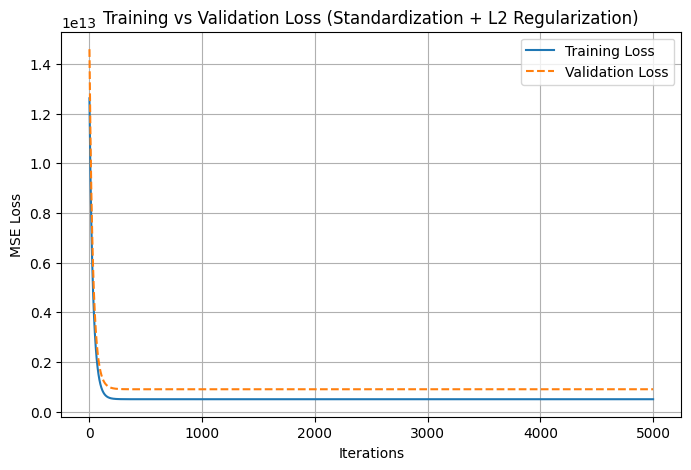

Final Train Loss (Normalized): 575640490202.44, Validation Loss: 924254234915.65
Final Train Loss (Standardized): 499817639347.91, Validation Loss: 901299426654.03


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Load data
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Convert categorical Yes/No columns to 0/1
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0, 'Yes':1, 'No':0})

# Select input features for 1.b
features = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'
]
X = data[features].values.astype(float)
y = data['price'].values.reshape(-1, 1)

# Train-validation split
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Gradient descent function (L2 on training only)
def gradient_descent(X_train, y_train, X_val, y_val, alpha, iterations, lambda_l2):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    bias = 0.0
    train_losses = []
    val_losses = []

    for i in range(iterations):
        y_pred = X_train.dot(theta) + bias
        error = y_pred - y_train

        # Gradients with L2 on weights only (bias not regularized)
        dtheta = (1/m) * X_train.T.dot(error) + (lambda_l2 / m) * theta
        dbias = (1/m) * np.sum(error)

        # Update parameters
        theta -= alpha * dtheta
        bias -= alpha * dbias

        # Training loss WITH L2 penalty
        train_loss = (1/(2*m)) * np.sum(error**2) + (lambda_l2/(2*m)) * np.sum(theta**2)

        # Validation loss WITHOUT regularization
        val_error = X_val.dot(theta) + bias - y_val
        val_loss = (1/(2*X_val.shape[0])) * np.sum(val_error**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, bias, train_losses, val_losses

# 3. Prepare scaled data
# 3.a Normalization
minmax_scaler = MinMaxScaler()
X_train_norm = minmax_scaler.fit_transform(X_train_raw)
X_val_norm = minmax_scaler.transform(X_val_raw)

# 3.b Standardization
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train_raw)
X_val_std = std_scaler.transform(X_val_raw)

# 4. Train models
iterations = 5000
alpha = 0.015  # can adjust depending on convergence
lambda_l2 = 3  # L2 regularization strength

# 4.a Normalization
theta_norm, bias_norm, train_losses_norm, val_losses_norm = gradient_descent(
    X_train_norm, y_train, X_val_norm, y_val, alpha=alpha, iterations=iterations, lambda_l2=lambda_l2
)

# 4.b Standardization
theta_std, bias_std, train_losses_std, val_losses_std = gradient_descent(
    X_train_std, y_train, X_val_std, y_val, alpha=alpha, iterations=iterations, lambda_l2=lambda_l2
)


# 5. Print final theta values
print("\nStandardization - Theta:", theta_std.flatten())
print("Standardization - Bias:", bias_std)

# 6. Plot training and validation loss separately
# Standardization plot
plt.figure(figsize=(8,5))
plt.plot(train_losses_std, label="Training Loss")
plt.plot(val_losses_std, label="Validation Loss", linestyle='--')
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss (Standardization + L2 Regularization)")
plt.legend()
plt.grid(True)
plt.show()

# 7. Print final losses for comparison
print("Final Train Loss (Normalized): {:.2f}, Validation Loss: {:.2f}".format(
    train_losses_norm[-1], val_losses_norm[-1]
))
print("Final Train Loss (Standardized): {:.2f}, Validation Loss: {:.2f}".format(
    train_losses_std[-1], val_losses_std[-1]
))

